In [1]:
suppressMessages(library(tidyverse))
suppressMessages(library(data.table))
suppressMessages(library(glue))

In [4]:
#| label: "set dir"
#| eval: false
setwd("/project/yangili1/cdai/SpliFi/analysis/")

In [19]:
base_dir = "/project/yangili1/cdai/SpliFi/code/"

## GTEx

In [16]:
# tissues
tissues <- dir("../code/results-naive-annotation/qtl/noisy/GTEx/")
tissues <- tissues[tissues != "Bladder"]

In [18]:
tissues
length(tissues)

[1] "Adipose-Subcutaneous"                
 [2] "Adipose-Visceral_Omentum_"           
 [3] "AdrenalGland"                        
 [4] "Artery-Aorta"                        
 [5] "Artery-Coronary"                     
 [6] "Artery-Tibial"                       
 [7] "Brain-Amygdala"                      
 [8] "Brain-Anteriorcingulatecortex_BA24_" 
 [9] "Brain-Caudate_basalganglia_"         
[10] "Brain-CerebellarHemisphere"          
[11] "Brain-Cerebellum"                    
[12] "Brain-Cortex"                        
[13] "Brain-FrontalCortex_BA9_"            
[14] "Brain-Hippocampus"                   
[15] "Brain-Hypothalamus"                  
[16] "Brain-Nucleusaccumbens_basalganglia_"
[17] "Brain-Putamen_basalganglia_"         
[18] "Brain-Spinalcord_cervicalc-1_"       
[19] "Brain-Substantianigra"               
[20] "Breast-MammaryTissue"                
[21] "Cells-Culturedfibroblasts"           
[22] "Cells-EBV-transformedlymphocytes"    
[23] "Colon-Sigmoid"                       
[24] "Colon-Transverse"                    
[25] "Esophagus-GastroesophagealJunction"  
[26] "Esophagus-Mucosa"                    
[27] "Esophagus-Muscularis"                
[28] "Heart-AtrialAppendage"               
[29] "Heart-LeftVentricle"                 
[30] "Kidney-Cortex"                       
[31] "Liver"                               
[32] "Lung"                                
[33] "MinorSalivaryGland"                  
[34] "Muscle-Skeletal"                     
[35] "Nerve-Tibial"                        
[36] "Ovary"                               
[37] "Pancreas"                            
[38] "Pituitary"                           
[39] "Prostate"                            
[40] "Skin-NotSunExposed_Suprapubic_"      
[41] "Skin-SunExposed_Lowerleg_"           
[42] "SmallIntestine-TerminalIleum"        
[43] "Spleen"                              
[44] "Stomach"                             
[45] "Testis"                              
[46] "Thyroid"                             
[47] "Uterus"                              
[48] "Vagina"                              
[49] "WholeBlood"

[1] 49

In [47]:
readQTLs <- function(tissue) {
  base_dir <- "../code/results-naive-annotation/qtl/noisy/GTEx"
  dir_suffix <- "separateNoise/cis_100000/perm"
  folder <- glue("{base_dir}/{tissue}/{dir_suffix}")
  qtlfiles <- list.files(folder, pattern = "*addQval.txt.gz", full.names = TRUE)
  qtls <- map_dfr(qtlfiles, fread)
  return(qtls)
}

In [66]:
filterQTLs <- function(qtls, fdr=0.1) {
  qtls <- qtls[q < fdr][, .N, by = list(isUP = str_detect(phenotype_id, ".+\\:N"))]
  return(qtls)
}

In [67]:
df <- readQTLs("Muscle-Skeletal")

In [68]:
df %>% dim


[1] 79712    21

In [77]:
readQTLs("Liver") %>% filterQTLs %>% .[isUP == T] %>% .[, N]

[1] 1673

In [79]:
names(tissues) <- tissues

In [81]:
tally <- map(tissues, \(x) readQTLs(x) %>% filterQTLs %>% .[isUP == T] %>% .[, N])

In [82]:
length(tally)

[1] 49

In [83]:
tally[1:3]

$`Adipose-Subcutaneous`
[1] 5788

$`Adipose-Visceral_Omentum_`
[1] 4851

$AdrenalGland
[1] 2730

In [102]:
unlist(tally) %>% enframe(name = "tissue", value = "N")  %>%  pull(N)  %>%  sum %>% `+`(., 26501)

# used this number to compute total GTEx + ROSMAP u-sQTLs

[1] 185065

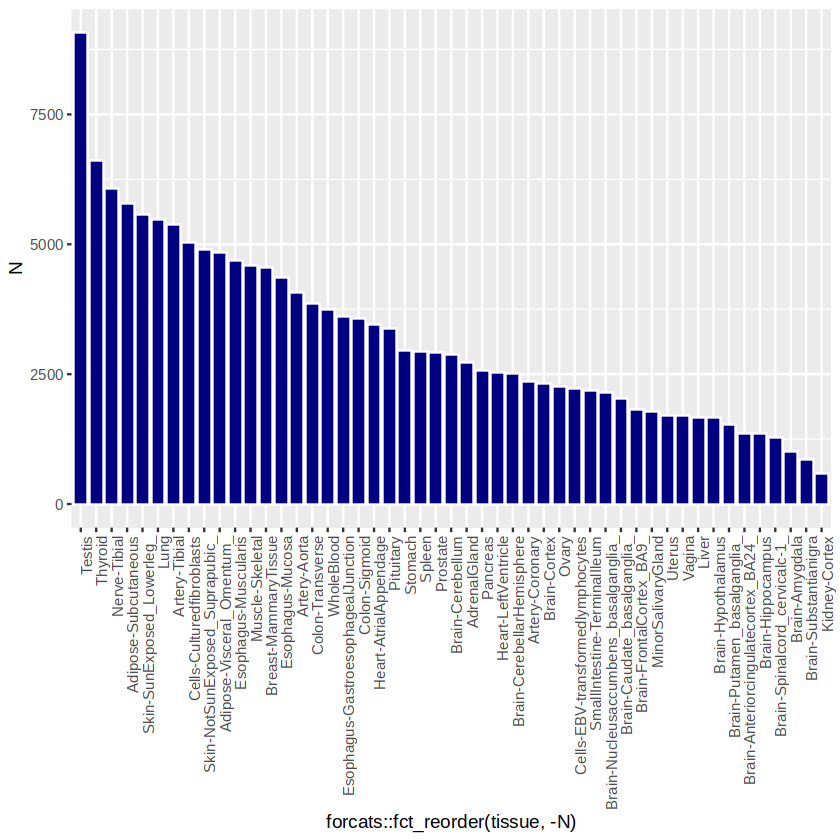

In [94]:
unlist(tally) %>% enframe(name = "tissue", value = "N") %>% arrange(desc(N)) %>% 
  ggplot() + geom_col(aes(x = forcats::fct_reorder(tissue, -N), y = N), fill = "navy", color = "#836868") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [37]:
list.files("../code/results-naive-annotation/qtl/noisy/GTEx/Liver/separateNoise/cis_100000/perm")

[1] "chr1.addQval.txt.gz"  "chr10.addQval.txt.gz" "chr11.addQval.txt.gz"
 [4] "chr12.addQval.txt.gz" "chr13.addQval.txt.gz" "chr14.addQval.txt.gz"
 [7] "chr15.addQval.txt.gz" "chr16.addQval.txt.gz" "chr17.addQval.txt.gz"
[10] "chr18.addQval.txt.gz" "chr19.addQval.txt.gz" "chr2.addQval.txt.gz" 
[13] "chr20.addQval.txt.gz" "chr21.addQval.txt.gz" "chr22.addQval.txt.gz"
[16] "chr3.addQval.txt.gz"  "chr4.addQval.txt.gz"  "chr5.addQval.txt.gz" 
[19] "chr6.addQval.txt.gz"  "chr7.addQval.txt.gz"  "chr8.addQval.txt.gz" 
[22] "chr9.addQval.txt.gz"

In [10]:
dir("../code/results-naive-annotation/qtl/noisy/GTEx/Liver/separateNoise/cis_100000/perm")

[1] "chr1.addQval.txt.gz"  "chr10.addQval.txt.gz" "chr11.addQval.txt.gz"
 [4] "chr12.addQval.txt.gz" "chr13.addQval.txt.gz" "chr14.addQval.txt.gz"
 [7] "chr15.addQval.txt.gz" "chr16.addQval.txt.gz" "chr17.addQval.txt.gz"
[10] "chr18.addQval.txt.gz" "chr19.addQval.txt.gz" "chr2.addQval.txt.gz" 
[13] "chr20.addQval.txt.gz" "chr21.addQval.txt.gz" "chr22.addQval.txt.gz"
[16] "chr3.addQval.txt.gz"  "chr4.addQval.txt.gz"  "chr5.addQval.txt.gz" 
[19] "chr6.addQval.txt.gz"  "chr7.addQval.txt.gz"  "chr8.addQval.txt.gz" 
[22] "chr9.addQval.txt.gz"